# Logistic Regression Analysis

### Import data and libraries

In [ ]:
## Load modules
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from matplotlib import pyplot as plt

## Specify WD
#wd = "/home/abf/BINF667013_Final_Project/"
wd = (
    "/Users/adam/Documents/BINF667013_BigDataAnalyticsHealthcare/" +
    "Final_Project/TEDS_Study"
)
os.chdir(wd)

## Load data
# teds_laws = pd.read_csv("analysis_objects/teds_laws.csv")
teds_imp_laws = pd.read_csv("analysis_objects/teds_imp_laws.csv")


### Define A function to flag relapses
def relapse(x, **kwargs):
    if  (
            x['SUB1'] == kwargs['drug'] and (
            x['SUB1_D'] == kwargs['drug'] or\
            x['SUB2_D'] == kwargs['drug'] or\
            x['SUB3_D'] == kwargs['drug']
        )
    ):
        return 1
    else:
        return 0


## Add Relapse Columns
teds_imp_laws = teds_imp_laws.assign(
    alc_cases = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 2, axis=1),
    hrn_cases = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 5, axis=1),
    met_cases = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 10, axis=1),
    alc_relapse = lambda x: x.loc[:,['SUB1', 'SUB1_D', 'SUB2_D', 'SUB3_D']].apply(relapse, axis=1, drug=2),
    hrn_relapse = lambda x: x.loc[:,['SUB1', 'SUB1_D', 'SUB2_D', 'SUB3_D']].apply(relapse, axis=1, drug=5),
    met_relapse = lambda x: x.loc[:,['SUB1', 'SUB1_D', 'SUB2_D', 'SUB3_D']].apply(relapse, axis=1, drug=10)
)




### Logit model to estimate influence of IC_laws on relapse rate

In [35]:
## Index casese of alcohol use at intake
alc_cases = teds_imp_laws.alc_cases == 1

## Fit Model
alc_result = smf.logit("alc_relapse ~ IC_law", data=teds_imp_laws.loc[alc_cases, :]).fit()
print(alc_result.summary())



Optimization terminated successfully.
         Current function value: 0.248188
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            alc_relapse   No. Observations:               408047
Model:                          Logit   Df Residuals:                   408045
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.1216
Time:                        11:10:08   Log-Likelihood:            -1.0127e+05
converged:                       True   LL-Null:                   -1.1529e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4160      0.007    198.015      0.000       1.402       1.430
IC_law         2.0050      0.

,IC_law,alc_cases,alc_relapse
0,0,124439,100137
1,1,283608,274633


   IC_law  alc_cases  alc_relapse  relapse_rate  total
0       0     124439       100137     80.470753    100
1       1     283608       274633     96.835421    100


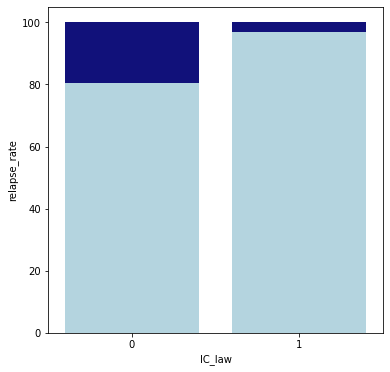

In [46]:
plt.figure(figsize=(6, 6))
plot_data = teds_imp_laws.loc[
    alc_cases,['IC_law','alc_cases','alc_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['alc_relapse'] / x['alc_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




In [ ]:
## Index casese of heroin use at intake
hrn_cases = teds_imp_laws.hrn_cases == 1

## Fit Model
hrn_result = smf.logit("hrn_relapse ~ IC_law", data=teds_imp_laws.loc[hrn_cases, :]).fit()
print(hrn_result.summary())



   IC_law  hrn_cases  hrn_relapse  relapse_rate  total
0       0     130957        98536     75.243019    100
1       1     210474       201793     95.875500    100


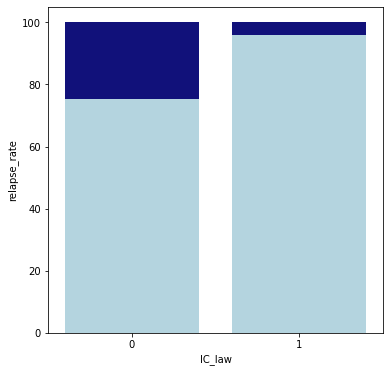

In [47]:
plt.figure(figsize=(6, 6))
plot_data = teds_imp_laws.loc[
    hrn_cases,['IC_law','hrn_cases','hrn_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['hrn_relapse'] / x['hrn_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




In [ ]:
## Index casese of methamphetamine use at intake
met_cases = teds_imp_laws.met_cases == 1

## Fit Model
met_result = smf.logit("met_relapse ~ IC_law", data=teds_imp_laws.loc[met_cases, :]).fit()
print(met_result.summary())



   IC_law  met_cases  met_relapse  relapse_rate  total
0       0      22936        21937     95.644402    100
1       1     121984       114550     93.905758    100


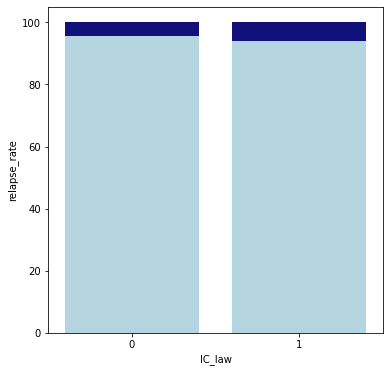

In [48]:
plt.figure(figsize=(6, 6))
plot_data = teds_imp_laws.loc[
    met_cases,['IC_law','met_cases','met_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['met_relapse'] / x['met_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()


